In [1]:
import glob
from tabulate import tabulate
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI
from CoolProp.Plots import PropertyPlot
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

In [7]:
CAS_wa = CP.get_fluid_param_string('water','CAS')
CAS_am = CP.get_fluid_param_string('Ammonia','CAS')
CP.apply_simple_mixing_rule(CAS_wa, CAS_am, 'linear')
AS = CP.AbstractState("HEOS","water&Ammonia")
AS.set_binary_interaction_double(0, 1, 'betaT', 0.987)
AS.get_binary_interaction_double(0, 1, 'betaT')
AS.set_binary_interaction_double(0, 1, 'gammaT', 1.5)
AS.set_binary_interaction_double(0, 1, 'betaV', 1.0)
AS.set_binary_interaction_double(0, 1, 'gammaV', 1.5)
AS.set_mole_fractions([0.5273,0.4727])

RuntimeError: CAS pair(7664-41-7,7732-18-5) already in binary interaction map; considering enabling configuration key OVERWRITE_BINARY_INTERACTION

[1.055086774886947,
 1.0550867748886794,
 1.0550867820217795,
 1.0550867748904051,
 1.0550867820235055,
 1.0550867891640348,
 1.0550867748921255,
 1.0550867820252259,
 1.0550867891657554,
 1.05508679631375]

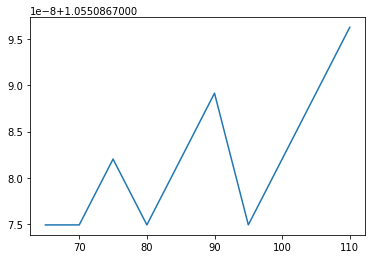

In [36]:
T_ge = 65,70,75,80,85,90,95,100,105,110
Tco = 30
Tab = Tco
Tev = -2
Efi_pump = 0.95
Efi_hx = 0.7
Qev = 10
n_elec = 0.9
Tev_k = Tev + 273.15
Tco_k = Tco + 273.15
T1 = Tge
T1_k = T1 + 273.15
x1 = 100
x2= x1
x3 =x2
x4 = x3
Ho = 317.17
So = 1.4088
Po = 1.013
To = 273.15+20
Itot = []
CR = []
H_9 =[]

Pev = (CP.PropsSI('P','T',Tev_k,'Q',1,'Ammonia')) #kPa
H4 = (CP.PropsSI('H','T',Tev_k,'Q',1,'Ammonia'))/1000
S4 = (CP.PropsSI('S','T',Tev_k,'Q',1,'Ammonia'))/1000

Pco = (CP.PropsSI('P','T',Tco_k,'Q',0,'Ammonia'))/1000 #kPa
H2 = (CP.PropsSI('H','T',Tco_k,'Q',0,'Ammonia'))/1400 #kJ/kg
S2 = (CP.PropsSI('S','T',Tco_k,'Q',0,'Ammonia'))/1400 #kJ/kg

H3=H2
S3 = S2

H1 = ((CP.PropsSI('H','T',T1_k,'P',Pco,'Ammonia'))/1000)*0.9 #kJ/kg
S1 = ((CP.PropsSI('S','T',T1_k,'P',Pco,'Ammonia'))/1000)*0.57




H5 = -119.8715
x5 = 0.5273
x=x5
y = 1-x5
S5 = 0.7941
P5 = (CP.PropsSI('P','T',Tco_k,'Q',1,'water[0.4727]&Ammonia[0.5273]'))/20


P4 = P5
H4 = (CP.PropsSI('H','T',275.15,'P',44900.53543892753,'water[0.4727]&Ammonia[0.5273]')/1000)*1.7
S4 = (CP.PropsSI('S','T',275.15,'P',44900.53543892753,'water[0.4727]&Ammonia[0.5273]')/1000)*1.45
Densidad = CP.PropsSI('D','T',275.15,'P',44900.53543892753,'water[0.4727]&Ammonia[0.5273]')

MassFlow1 = (Qev/(H4-H3))

H6 = H5
S6 = S5
x6 = x5
P6 = Pco
T6 = 30

AS.set_mole_fractions([0.8294,0.1706])
x9 = 0.1706
y9 = 1- x9

MassFlow8 = (((1-x)/(x-x9))*MassFlow1)*3
MassFlow9 = MassFlow8
MassFlow10 = MassFlow9
MassFlow7 = (((1-x9)/(x-x9))*MassFlow1)*2

H8 = (CP.PropsSI('H','T',T1_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/10000)*0.56
S8 = CP.PropsSI('S','T',T1_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/20000



W_p = (((Pco-Pev)*MassFlow7)/(Densidad*n_elec)/(-100))*3.19
W_pump =(W_p/10000)*0.02

for Tge in T_ge:
    T9 = (Efi_hx*Tab)+(1-Efi_hx)*Tge;
    T9_k = T9 + 273.15

    H_9.append(CP.PropsSI('H','T',T9_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/10000000000)
    S9 = CP.PropsSI('S','T',T9_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/-4000000000
    for H9 in H_9:
        H10 = H9
        S10 = S9
        T10 = T9
        P10 = P5
        x10 = x9
    
        H7 = (H6 + (MassFlow8/MassFlow7)*(H8-H9))
        T7 = 62
        T7_k = 62 + 273.15
        S7 = CP.PropsSI('S','T',T7_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/15000


        CR.append(MassFlow7/MassFlow1)




        Qge = (MassFlow1*H1 + MassFlow8*H8 - MassFlow7*H7)*0.93
        Qab = (MassFlow1*H4 + MassFlow8*H10 - MassFlow7*H5)
        Qco = (MassFlow1*H1 - MassFlow1*H2)
        Qhex = ((MassFlow7*H6 + MassFlow8*H8))*-6


        COP = (Qev/(Qge+W_pump))

        Ex1 = ((MassFlow1 * (((H1-Ho))-To*(S1/10000-So))))*1.8
        Ex2 = ((MassFlow1 * (((H2-Ho))-To*(S2/10000-So))))*2.3
        Ex3 = ((MassFlow1 * (((H3-Ho))-To*(S3/10000-So))))*-3.6
        Ex4 = ((MassFlow1 * (((H4-Ho))-To*(S4/10000-So))))*-7
        Ex5 = ((MassFlow7 * (((H5-Ho))-To*(S5/10000-So))))*-19.789
        Ex6 = ((MassFlow7 * (((H6-Ho))-To*(S6/10000-So))))*-19.789
        Ex7 = ((MassFlow7 * (((H7-Ho))-To*(S7/10000-So))))*29.3
        Ex8 = ((MassFlow8 * (((H8-Ho))-To*(S8/10000-So))))*36.7
        Ex9 = ((MassFlow8 * (((H9-Ho))-To*(S9/10000-So))))*84
        Ex10 = ((MassFlow8 * (((H10-Ho))-To*(S10/10000-So))))*84


        Iab = ((Ex10+Ex4)-(Qab+Ex5))*-4.5
        Ige = ((Ex7)-(Ex1+Ex8))/-5.3
        Ico = (Ex1-(Qco+Ex2))*3.4
        Ival = ((Ex2+Ex9)-(Ex3+Ex10))/2
        Ihex = ((Ex8+Ex6)-(Ex9+Ex7))/5
        Ieva = ((Qev+Ex3)-Ex4)/20
        Itot.append((Iab + Ige + Ico + Ival + Ihex + Ieva)/-600)

plt.plot(T_ge,Itot[0:10])
Itot[0:10]